# Laboratoire 0: Introduction aux outils

Bienvenue dans les laboratoires de robotique mobile! Cette séance a pour objectif de vous familiariser avec les outils que nous utiliserons tout au long de la session. Si vous voyez ce message, c'est que vous avez déjà réussi à lancer jupyter. Bien! Voyons maintenant comment les notebooks fonctionnent.

## Jupyter et IPython

[Jupyter](http://jupyter.org/) est une plate-forme interactive qui permet de combiner texte et code dans un notebook, comme celui que vous voyez présentement. Le back-end que nous utiliserons est [IPython](https://ipython.org/), ce qui veut dire que nous pouvons entrer du code python dans une cellule de la présente page.

In [1]:
print('En sélectionnant cette cellule puis en appuyant sur SHIFT+Enter, vous exécuterez du code python.')

for i in range(10):
    print(i)

En sélectionnant cette cellule puis en appuyant sur SHIFT+Enter, vous exécuterez du code python.
0
1
2
3
4
5
6
7
8
9


Notez qu'il est aussi possible d'exécuter une cellule en appuyant sur un bouton de la barre d'outils.

Pendant la session, on pourra donc communiquer avec le robot à travers Jupyter. Nous avons déjà écrit une librarie qui permet de communiquer avec le robot. Nous vous fournirons des exemples de code pour établir la communication, puis vous aurez à analyser les données récoltées.

## Jupyter: trucs et astuces

Mais avant de commencer, quelques informations à propos de Jupyter. Vous pouvez arrêter l'exécution d'une cellule en sélectionnant la cellule puis en appuyant sur `i` deux fois (le `i` est pour _interrupt_). Pratique quand on lance une boucle infinie par accident!

In [2]:
# Lancez l'exécution de cette cellule puis arrêtez-là en utilisant "i i".

while True:
    i = 0

KeyboardInterrupt: 

Une autre façon d'arrêter l'exécution du code est de sélectionner, dans le menu du haut, `Kernel >> Interrupt`. Remarquez aussi les autres options de ce menu, qui vous seront certainement très utiles. `Kernel >> Restart` relance le back-end python: toutes les variables que vous aviez assigné avant vont disparaître. En cas de problème, c'est toujours une bonne idée de relancer le back-end puis de ré-exécuter les cellules qui nous intéressent avant de paniquer.

Finalement, une liste plus complète des raccourcis clavier est disponible [ici](https://sowingseasons.com/blog/reference/2016/01/jupyter-keyboard-shortcuts/23298516).

# Introduction au simulateur

<mark>TODO réviser ce texte</mark>

En robotique, il n'est pas toujours pratique, ou possible, de toujours faire ses tests avec un vrai robot, comme lors d'un cours universitaire en pleine pandémie...

Heureusement, il existe plusieurs outils de simulations qui permettent de tester ses algorithmes sans avoir de base robotique.

Dans le cours nous allons utiliser Gazebo (<mark>TODO link à leur site web</mark>), un simulateur qui pour la bibliotheque ROS (<mark>TODO link à leur site web</mark>), un library courament utilisée en milieu 

Pour les intéressés, le cours [GLO-4007](https://www.ulaval.ca/etudes/cours/glo-4007-perception-3d-pour-vehicules-autonomes) et [GLO-7007](https://www.ulaval.ca/etudes/cours/glo-7007-perception-3d-pour-vehicules-autonomes) donne davantage d'information sur l'utilisation de ROS. [Notes de cours](https://github.com/norlab-ulaval/percep3d_lessons)

Toutefois, pour ce cours, nous fournissons du code permettant d'intéragir avec le robot, ou le simulateur, sans devoir jouer avec ROS.

Pour utiliser le simulateur, lancer l'image disponible sur le site de cours. Les notebooks peuvent s'executer sur votre machine (hors simulateur). Faire ces etapes de setup

## Vrai robot vs Simulateur

Changer la ligne dans command et sensors <mark>TODO</mark>

## Configuration de la machine virtuelle
User: student
mot de passe student

- Télécharger la machine virtuelle disponible sur le site de cours
- Utiliser VirtualBox
- Activer l'accélération matérielle 
- Installer guest addtions: Devices -> Insert Guest...
- View -> auto resize
- Port forwarding (TODO screenshot)
- copy past bidirectionnel (optionnel)

Voir le notebook <mark>TODO linker</mark> pour voir comment les machines virtuelles ont été configurées

Le contenu du workspace se trouve: linker repo

## Création d'une carte

Pour vous introduire au simulateur, nous allons construire une carte avec un algorithme que vous allez voir plus loin dans le cours: SLAM, simultanous localisation and mapping.

<mark>TODO peut-etre faire un script qui lance tout</mark>

<mark>TODO Screenshots</mark>

Une fois dans la machine virtuelle, lancer un terminal avec CTRL-ALT-T

Pour lancer le simulateur.

```bash
roslaunch turtlebot3_gazebo turtlebot3_world.launch
```

Devriez voir gazebo s'ouvrir, bouger la caméra avec ...

Lancer un autre terminal avec CTRL-SIFT-T

Ajuster le pas de la simulation pour avoir Real Time Factor ~ 1, plus le pas est grand, plus le real time factor sera grand. Pas besoin d'etre exactement sur 1, entre 1 et 2 est suffisant. Noter cette valeur dans <mark>catkin_ws/.../././././set_time_step.sh</mark>

```bash
gz physics -s 0.001
```


```bash
roslaunch turtlebot3_slam turtlebot3_slam.launch slam_methods:=gmapping
```

RViz devrait s'ouvrir, un outil pour visualiser l'etat du robot, voir la carte construite par l'algo SLAM

Dans un autre terminal

```bash
roslaunch turtlebot3_teleop turtlebot3_teleop_key.launch
```

Permet de controller le robot avec wasdx (decrire ce que chaque touche fait)

Maintenant deplacer vous dans la carte pour construire la carte

Une fois construite, sauvegarder la carte, dans un nouveau terminal

```bash
rosrun map_server map_saver -f ~/map
```

Vous pouvez maintenant fermer tous les terminaux.

## Planification de chemin

```bash
roslaunch turtlebot3_gazebo turtlebot3_world.launch
```

```bash
gz physics -s 0.001
```

```bash
roslaunch turtlebot3_navigation turtlebot3_navigation.launch map_file:=$HOME/map.yaml
```

Cliquer sur 2d Pose estimate, et placer le vecteur pres de la position relle du robot dans le simulateur. (TODO image)

La carte en bleu et rouge devrait etre alignée avec la carte.

Cliquer sur 2d nav goal, placer un vecteur dans la carte, le robot va s'y rendre avec la bonne orientation

## Interagir avec le robot

<mark>TODO AJOUTER SHARP SENSOR</mark>

<mark>TODO Modifier pour simulateur, ip = localhost</mark>

En premier lieu assurez vous que votre ordinateur est connecté au même réseau wifi que les robots. La SSID du réseau est `glo7021_24ghz` ou bien `glo7021_5ghz`. Le mot de passe du réseau est `unchevalblanc`.

Il est maintenant temps de nous connecter au robot. La logique de connexion sera expliquée plus en détail cette fois-ci. Dans les prochains laboratoires, nous vous fournirons le code sans explications.

Importons d'abord la classe qui nous permet de communiquer avec le robot.

In [15]:
from robmob.robot import Robot

Il faut ensuite fournir l'IP du robot qui vous a été fourni. L'IP est sur une étiquette collée au robot. Avec l'IP, on peut créer une instance de la classe `Robot`.

In [16]:
robot_ip = 'localhost' # Remplacez cette ip par l'ip de votre robot ou par localhost en simulation
robot = Robot(robot_ip)
robot.connect()

Maintenant que nous sommes connectés au robot, tentons de communiquer avec un de ses senseurs. Débutons avec un capteur infra-rouge. Comme il y a deux capteurs infra-rouge sur le robot, il faut spécifier l'ID du senseur avec lequel on veut communiquer (`0` ou `1`).

In [17]:
from robmob.sensors import SharpSensor

sensor = SharpSensor(0)

Maintenant, la ligne la plus importante. On doit ajouter la variable `sensor` dans la collection des senseurs que notre robot « écoute ». Ça revient à dire au robot de capturer les données du capteur infra-rouge, et de les ranger dans l'instance `sensor` que nous avons créé.

In [18]:
robot.add_sensor(sensor)

Au moment où vous exécutez cette ligne, les données partent du robot vers votre machine. Dans le cas du capteur infra-rouge le flux de données est assez léger, mais quand nous jouerons avec des capteurs plus sophistiqués, le wifi sera mis à l'épreuve. Tentez de garder cela en tête au cours de la session!

L'instance de `SharpSensor` contient un buffer qui se fait remplir par `robot`. Jetons-y un coup d'oeil. `SharpSensor.peek_data()` nous retourne la dernière donnée qui nous a été envoyée par le robot. Si vous l'exécutez plusieurs fois vous aurez de valeurs différentes.

> **PROTIP** Appuyez sur CTRL-Enter (au lieu de SHIFT-Enter) pour exécuter une même cellule plusieurs fois de suite (sans que la prochaine cellule ne soit sélectionnée).

In [19]:
sensor.peek_data()

1.2418216466903687

`sensor.read_buffer()` retourne les `sensor.buffer_size` dernières données.

In [20]:
print('Voici les ' + str(sensor.buffer_size) + ' dernières données:')
sensor.read_buffer()

Voici les 100 dernières données:


array([1.20906448, 1.23998415, 1.35971665, 1.16627514, 1.26714683,
       1.1759913 , 1.16975403, 1.16901624, 1.24172747, 1.14415276,
       1.14625573, 1.12657547, 1.16935766, 1.26309788, 1.26343393,
       1.1742208 , 1.40113533, 1.4229064 , 1.17289186, 1.12163281,
       1.28534925, 1.05824602, 1.19568145, 1.07846522, 1.22018683,
       1.12405753, 1.22741556, 1.45435905, 1.19962382, 1.17428768,
       1.34548259, 1.13306189, 1.22359467, 1.33286107, 1.24182165,
       1.16573596, 1.28320146, 1.1046555 , 1.13232148, 1.15554321,
       1.21712995, 1.25417686, 1.16290796, 1.12908745, 1.35488975,
       1.23876095, 1.27673888, 1.27520418, 1.13020766, 1.34253883,
       1.02423692, 1.30171394, 1.24409521, 1.32170773, 1.04829931,
       1.16828406, 1.09206891, 1.16557276, 1.42126334, 1.37304652,
       0.98534679, 1.05411637, 1.07099831, 1.25268042, 1.06467378,
       1.19469047, 1.22273231, 1.25690007, 1.17947793, 1.35330796,
       1.40876031, 1.28891182, 1.14464474, 1.31293595, 1.26448

> **PROTIP** Comme le capteur infra-rouge a une fréquence d'acquitision très rapide, le buffer se remplit rapidement. D'autres capteurs (comme la kinect) ne sont pas aussi rapides, et il se peut que le buffer soit vide si vous exécutez cette fonction plusieurs fois de suite. Il suffira alors de patienter un peu.

## Graphiques avec pyplot

On peut maintenant faire un graphique avec ces données! Importons d'abord un module qui nous permet de faire des graphiques: `matplotlib.pyplot`. Ce module se comporte de façon très similaire à MATLAB. Vous trouverez un tutoriel pour pyplot [ici](http://matplotlib.org/users/pyplot_tutorial.html). Rechercher "How to ... pyplot" dans google reste l'outil le plus utile.

In [21]:
import matplotlib.pyplot as plt

Ici on indique à jupyter qu'il devrait afficher les graphiques dans le notebook, au lieu de simplement nous retourner leur adresse mémoire...

In [22]:
%matplotlib inline

Maintenant, collectons les données, puis affichons-les!

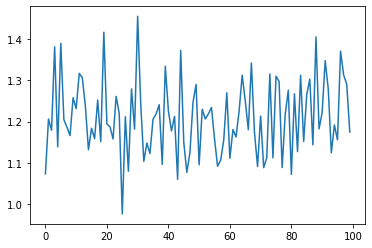

In [23]:
data = sensor.read_buffer()
plt.plot(data)

Améliorons ce graphique avec un titre et des axes. Ce genre de code vous sera utile tout au long de la session.

Text(0, 0.5, 'Force du signal (V)')

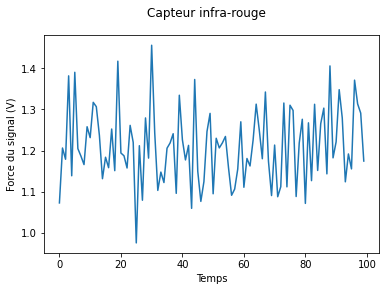

In [24]:
figure = plt.figure()
plt.plot(data)

figure.suptitle('Capteur infra-rouge')
plt.xlabel('Temps')
plt.ylabel('Force du signal (V)')

Vous savez maintenant faire des interactions avec votre base robotique! Si il vous reste du temps, vous pouvez explorer d'autres possibilités en ouvrant le notebook `Controller.ipynb`. Bonne session!